<a href="https://colab.research.google.com/github/Yurakc/platzi_data/blob/main/Curso%20de%20Fundamentos%20Pr%C3%A1cticos%20de%20Machine%20Learning/28_32_Red_neuronal_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

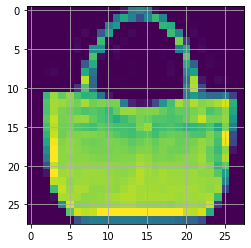

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

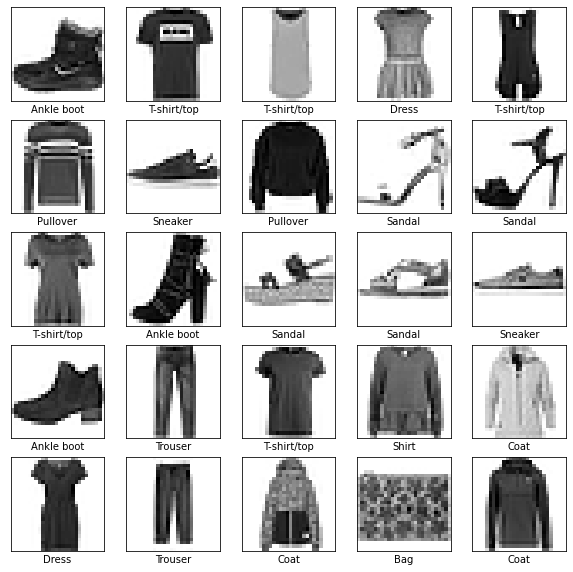

In [7]:
%matplotlib inline
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [9]:
model.compile(optimizer = tf.compat.v1.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5020 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3130 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2957 - accuracy: 0.8913


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy',  test_acc)

313/313 [==============================] - 0s 925us/step - loss: 0.3732 - accuracy: 0.8622
Accuracy 0.8622000217437744


In [12]:
predictions = model.predict(test_images)

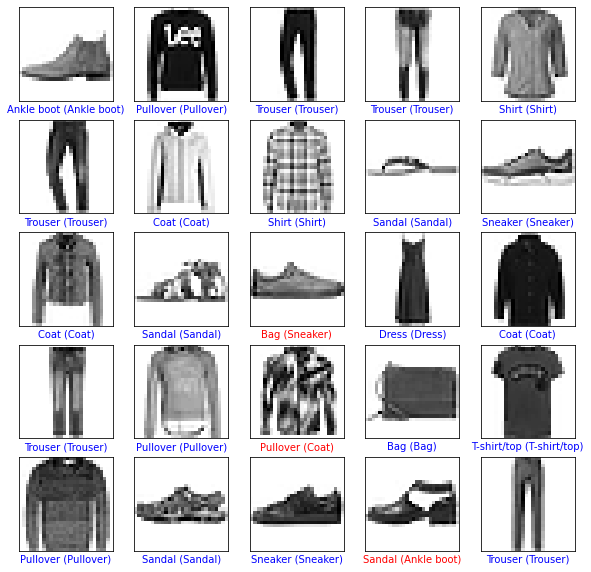

In [14]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)